In [1]:
import pandas as pd

# ==========================
# 1) Load your dataset
# ==========================
file_path = r"C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets.csv"
df = pd.read_csv(file_path)

# ==========================
# 2) Remove Duplicates
# ==========================
df_cleaned = df.drop_duplicates(subset='content')

# ==========================
# 3) Add a column: number of words
# ==========================
df_cleaned['content_length'] = df_cleaned['content'].apply(lambda x: len(str(x).split()))

# ==========================
# 4) Remove very short tweets (less than 5 words)
# ==========================
df_cleaned = df_cleaned[df_cleaned['content_length'] >= 5]

# ==========================
# 5) Save cleaned dataset
# ==========================
output_path = r"C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_cleaned.csv"
df_cleaned.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ Cleaned dataset saved to {output_path}")
print(f"Remaining tweets: {len(df_cleaned)}")


✅ Cleaned dataset saved to C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_cleaned.csv
Remaining tweets: 98


In [24]:
# ==========================
# Import Libraries
# ==========================
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji

# Install if not installed
# !pip install emoji

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# ==========================
# Load Your Cleaned Dataset
# ==========================
file_path = r"C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_cleaned.csv"
df = pd.read_csv(file_path)

# ==========================
# Extraction Functions
# ==========================
def extract_emojis(text):
    return [c for c in str(text) if c in emoji.EMOJI_DATA]

def extract_hashtags(text):
    return re.findall(r'#(\w+)', str(text))

def extract_mentions(text):
    return re.findall(r'@(\w+)', str(text))

df['emojis'] = df['content'].apply(extract_emojis)
df['hashtags'] = df['content'].apply(extract_hashtags)
df['mentions'] = df['content'].apply(extract_mentions)

# ==========================
# Cleaning Function
# ==========================
def clean_text(text):
    text = re.sub(r'RT', '', str(text))
    text = re.sub(r'&amp;', '&', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'[?!.;:,#@-]', '', text)
    text = re.sub(r'<u\+.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

df['cleaned_text'] = df['content'].apply(clean_text)

# ==========================
# Tokenization
# ==========================
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

# ==========================
# Stopword Removal
# ==========================
stop_words = set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Extend custom stopwords list
custom_stopwords = set([
    'mental', 'health', 'im', 'youre', 'one', 'even', 'like', 
    'see', 'going', 'really', 'look', 'may', 'want', 'cant','thats','keep','get','go','dont','someone','people','would','day'
])

df['tokens_no_stopwords'] = df['tokens_no_stopwords'].apply(
    lambda tokens: [word for word in tokens if word not in custom_stopwords]
)

# ==========================
# Save Prepared Data
# ==========================
output_path = r"C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_prepared.csv"
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ Preprocessed dataset saved to: {output_path}")
print(df[['content', 'cleaned_text', 'tokens_no_stopwords']].head())


✅ Preprocessed dataset saved to: C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_prepared.csv
                                             content  \
0  Want more detail?\n\nYou can't force taxpayers...   
1  The game did change when the democrats and fak...   
2  It should be changed to Mental Health awarenes...   
3  Lots of prayers.  Keeps my mental health\n Str...   
4  Mental health is going to be a big issue going...   

                                        cleaned_text  \
0  want more detail\n\nyou cant force taxpayers i...   
1  the game did change when the democrats and fak...   
2  it should be changed to mental health awarenes...   
3   lots of prayers  keeps my mental health\n strong   
4  mental health is going to be a big issue going...   

                                 tokens_no_stopwords  
0  [detail, force, taxpayers, life, servitude, vi...  
1  [game, change, democrats, fake, news, media, l...  
2                         [changed, awareness, need] 

[nltk_data] Downloading package punkt to C:\Users\Georges
[nltk_data]     Ghosn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Georges
[nltk_data]     Ghosn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Georges
[nltk_data]     Ghosn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Georges Ghosn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
!pip install wordcloud



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install emoji


   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   --------------------------------- ---- 524.3/590.6 kB 577.4 kB/s eta 0:00:01
   -------------------------------------- 590.6/590.6 kB 438.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


🔝 Top 20 frequent words:
[('need', 11), ('help', 11), ('life', 9), ('issues', 7), ('sleep', 7), ('care', 6), ('good', 5), ('better', 5), ('support', 5), ('woman', 5), ('ill', 5), ('please', 5), ('time', 5), ('physical', 4), ('crisis', 4), ('real', 4), ('nothing', 4), ('fight', 4), ('thing', 4), ('find', 4)]


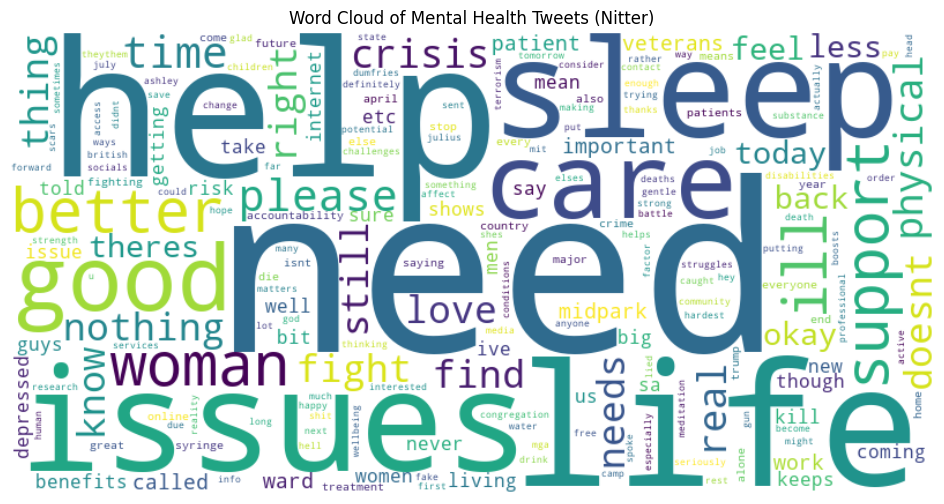

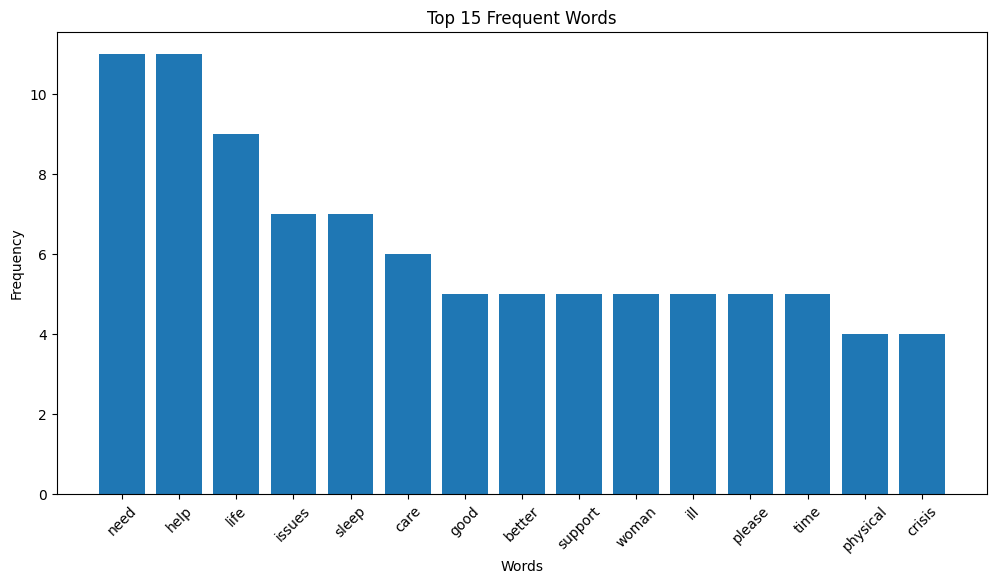

In [25]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ==========================
# 1) Flatten the token list
# ==========================
all_tokens = [word for tokens in df['tokens_no_stopwords'] for word in tokens]

# ==========================
# 2) Count word frequency
# ==========================
word_freq = Counter(all_tokens)

# Show top 20 most common words
print("🔝 Top 20 frequent words:")
print(word_freq.most_common(20))

# ==========================
# 3) Plot Word Cloud
# ==========================
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Mental Health Tweets (Nitter)")
plt.show()

# ==========================
# 4) Plot Bar Chart (Optional)
# ==========================
top_words = dict(word_freq.most_common(15))
plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation=45)
plt.title("Top 15 Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [2]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from textblob import TextBlob
import pandas as pd

# ==========================
# Load Cleaned Nitter Dataset
# ==========================
file_path = r"C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_cleaned.csv"
df = pd.read_csv(file_path)

# ==========================
# Sentiment Analysis Function
# ==========================
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return pd.Series([polarity, sentiment])

# ==========================
# Apply Sentiment Analysis
# ==========================
df[['polarity', 'sentiment']] = df['content'].apply(get_sentiment)

# ==========================
# Sentiment Summary
# ==========================
sentiment_counts = df['sentiment'].value_counts()
print("✅ Sentiment Summary:")
print(sentiment_counts)

# ==========================
# Save Dataset with Sentiment
# ==========================
output_path = r"C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_sentiment.csv"
df.to_csv(output_path, index=False, encoding='utf-8')
print(f"✅ Sentiment analysis saved to: {output_path}")


✅ Sentiment Summary:
sentiment
Positive    54
Negative    43
Neutral      1
Name: count, dtype: int64
✅ Sentiment analysis saved to: C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_sentiment.csv


C:\Users\Georges Ghosn\AppData\Local\Temp\ipykernel_10128\4217375846.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


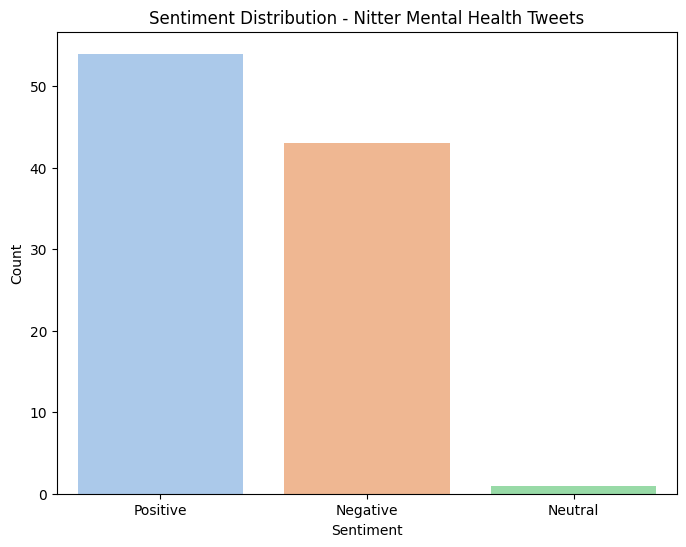

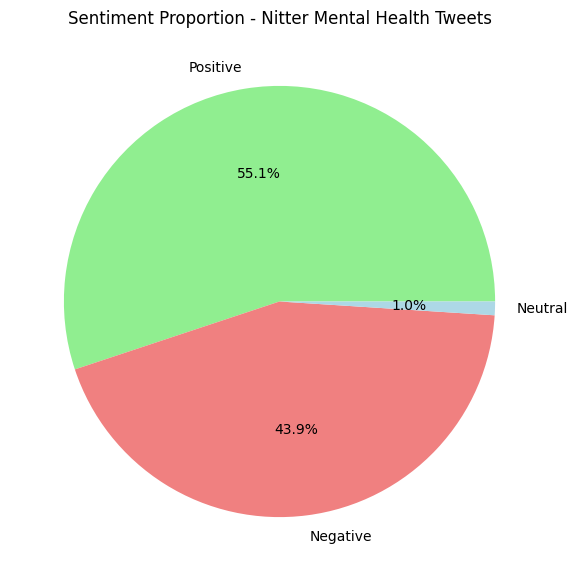

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Load Dataset
# ==========================
file_path = r"C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_sentiment.csv"
df = pd.read_csv(file_path)

# ==========================
# Plot Sentiment Bar Chart
# ==========================
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution - Nitter Mental Health Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ==========================
# Plot Sentiment Pie Chart
# ==========================
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title("Sentiment Proportion - Nitter Mental Health Tweets")
plt.show()



🔝 Top 10 TF-IDF Words in Nitter:
health    0.358802
mental    0.353275
people    0.109201
just      0.078379
help      0.076449
need      0.075862
life      0.054163
like      0.050188
care      0.050142
issues    0.045046
dtype: float64


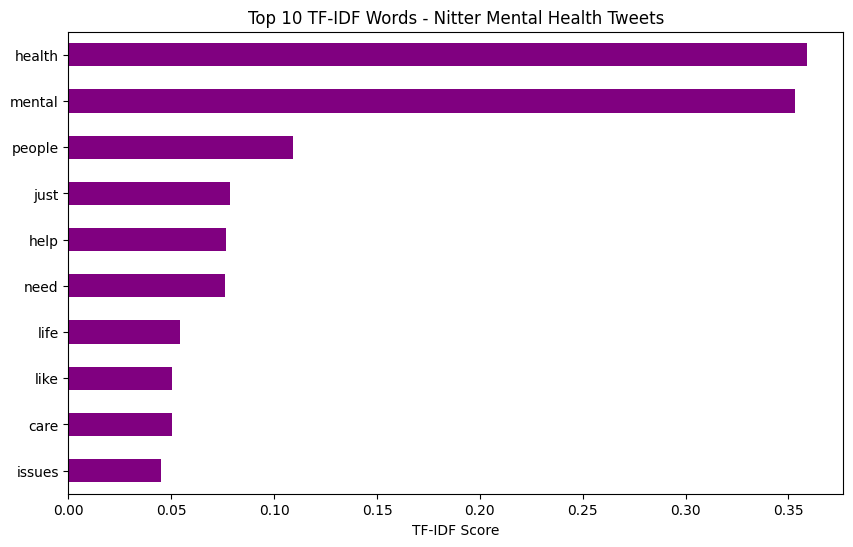

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# ==========================
# Load Nitter Dataset
# ==========================
nitter_path = r"C:\Users\Georges Ghosn\Desktop\mental_health100_nitter_tweets_cleaned.csv"
nitter_df = pd.read_csv(nitter_path)

# ==========================
# TF-IDF Vectorizer
# ==========================
tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(nitter_df['content'])

# ==========================
# Get TF-IDF Scores
# ==========================
tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_mean = tfidf_scores.mean().sort_values(ascending=False)

print("\n🔝 Top 10 TF-IDF Words in Nitter:")
print(tfidf_mean.head(10))

# ==========================
# Plot
# ==========================
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tfidf_mean.head(10).plot(kind='barh', color='purple')
plt.gca().invert_yaxis()
plt.title("Top 10 TF-IDF Words - Nitter Mental Health Tweets")
plt.xlabel("TF-IDF Score")
plt.show()


In [ ]:
!pip install gensim pyLDAvis


^C


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   -----------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install --upgrade pip


^C


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- -------------------------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\Georges Ghosn\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip
